<a href="https://colab.research.google.com/github/Ilhammkt/Machine-Learning/blob/main/7thTask/Ilham_Khodar_Trijaya_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama    : Ilham Khodar Trijaya

NIM     : 1103213084

Tugas  : XGBoost Model Week 7

Dataset : melb_data.csv

Dokumentasi ChatGPT : https://chat.openai.com/share/77bd7f14-6a66-49c5-bf99-dbf65777658a

**PROMPT CHATGPT IMPORT DRIVE** : berikan kode python untuk mengubungkan drive pada google colab

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
#1 Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [3]:
#2 Membaca dataset
file_path = '/content/drive/MyDrive/Dataset/melb_data.csv'
data = pd.read_csv(file_path)

In [5]:
data

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [6]:
data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
data.tail()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0
18395,23546,Yarraville,33 Freeman St,4,h,1050000.0,VB,Village,26/08/2017,6.3,...,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [9]:
data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [10]:
#3 Memilih fitur yang akan digunakan
features = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[features]
y = data['Price']

In [11]:
#4 Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#5 Melatih model XGBoost
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

#6 Melakukan prediksi
y_pred = model.predict(X_test)

In [12]:
#7 Menghitung dan menampilkan mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 148173847689.7992


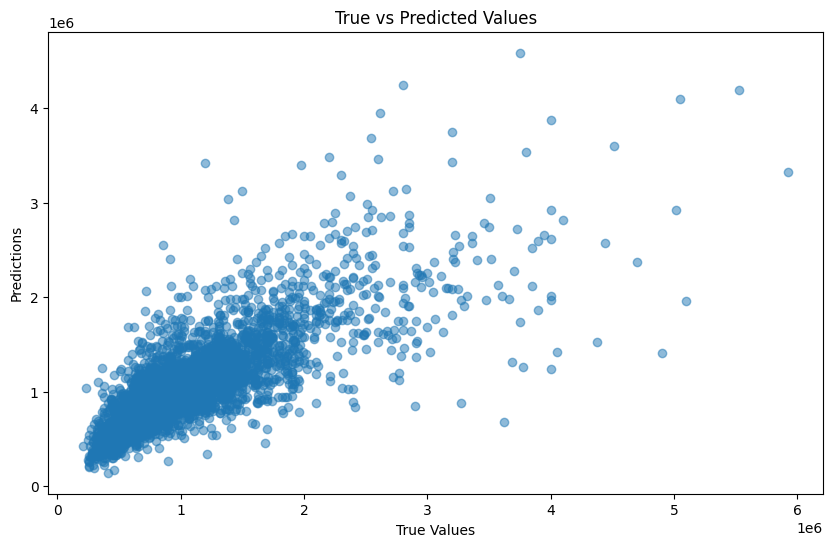

In [13]:
#8 Visualisasi prediksi vs nilai sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

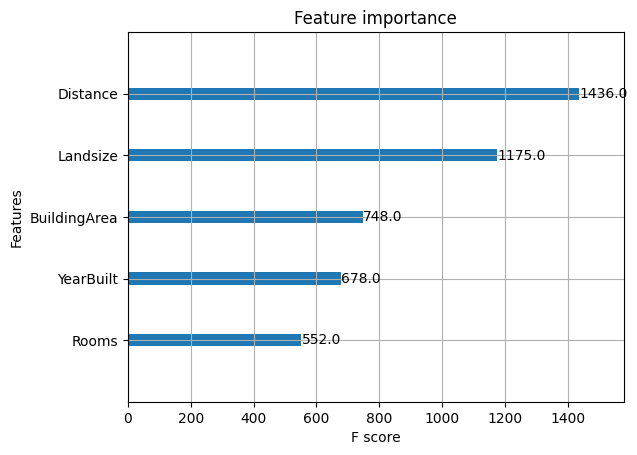

In [14]:
# Visualisasi fitur yang paling penting
xgb.plot_importance(model)
plt.show()

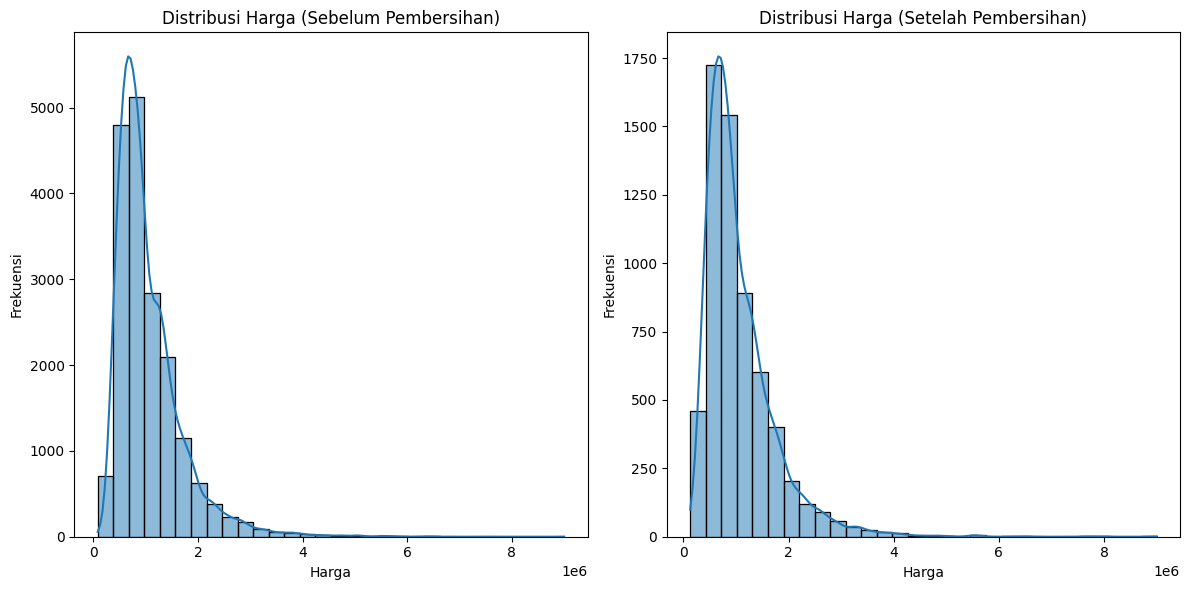

In [15]:
# Visualisasi distribusi harga sebelum dan setelah pembersihan data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribusi Harga (Sebelum Pembersihan)')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(data.dropna()['Price'], bins=30, kde=True)
plt.title('Distribusi Harga (Setelah Pembersihan)')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()